In [ ]:
# Instalasi Kaggle API untuk mengunduh dataset
!pip install kaggle

In [1]:
# Import library yang dibutuhkan
import os
import numpy as np
import zipfile
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


In [2]:
# Pengaturan API Kaggle (mengganti dengan API key pribadi Anda)
os.environ['KAGGLE_USERNAME'] = 'daffaputra'
os.environ['KAGGLE_KEY'] = '7821178dcdda57838b48474b06faae65'

In [3]:
# Unduh dataset dari Kaggle
!kaggle datasets download -d anikishaev/photo-retouch-sm-ds


 88% 33.0M/37.5M [00:00<00:00, 78.6MB/s]
100% 37.5M/37.5M [00:00<00:00, 88.8MB/s]


In [4]:
# Ekstraksi dataset
with zipfile.ZipFile('photo-retouch-sm-ds.zip', 'r') as zip_ref:
    zip_ref.extractall()


In [5]:
# Direktori dataset
data_dir = "auto-retouch"
train_dir = os.path.join(data_dir, "Input")

In [6]:
# Pra-pemrosesan data
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training',
    seed=42
)

valid_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation',
    seed=42
)

Found 72 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [7]:
# Arsitektur CNN
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [8]:
# Kompilasi model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Pelatihan model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=valid_generator
)

Epoch 1/10
3/3 [==============================] - 7s 3s/step - loss: 3.6857 - accuracy: 0.4861 - val_loss: 1.3090 - val_accuracy: 0.5000
Epoch 2/10
3/3 [==============================] - 5s 2s/step - loss: 0.9352 - accuracy: 0.5000 - val_loss: 0.6996 - val_accuracy: 0.5000
Epoch 3/10
3/3 [==============================] - 6s 2s/step - loss: 0.6961 - accuracy: 0.5000 - val_loss: 0.6924 - val_accuracy: 0.5000
Epoch 4/10
3/3 [==============================] - 6s 2s/step - loss: 0.7017 - accuracy: 0.5000 - val_loss: 0.6925 - val_accuracy: 0.5000
Epoch 5/10
3/3 [==============================] - 5s 2s/step - loss: 0.6928 - accuracy: 0.5000 - val_loss: 0.6922 - val_accuracy: 0.5000
Epoch 6/10
3/3 [==============================] - 5s 1s/step - loss: 0.6913 - accuracy: 0.5139 - val_loss: 0.6923 - val_accuracy: 0.5000
Epoch 7/10
3/3 [==============================] - 5s 2s/step - loss: 0.6911 - accuracy: 0.5417 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 8/10
3/3 [=========================

In [56]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    seed=42
)

test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc}')

Found 88 images belonging to 2 classes.
3/3 [==============================] - 3s 736ms/step - loss: 0.6865 - accuracy: 0.6023
Test accuracy: 0.6022727489471436


In [59]:
# Path ke direktori yang berisi gambar-gambar input
input_directory = "auto-retouch/input"
input_image_filenames = ["img11.jpg", "img12.jpg", "img13.jpg"]

1/1 [==============================] - 0s 34ms/step


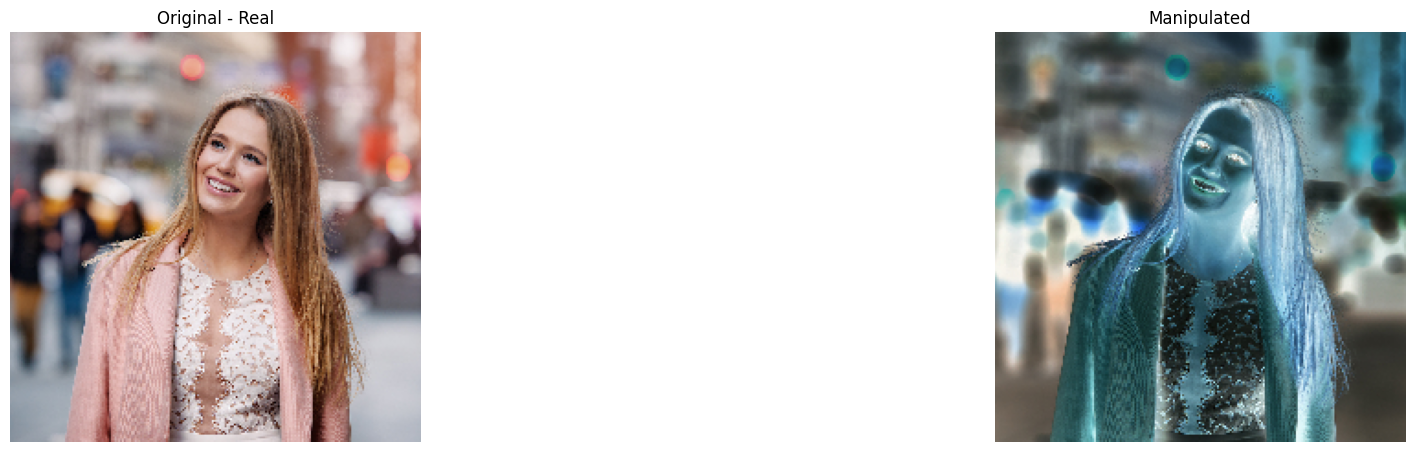

1/1 [==============================] - 0s 44ms/step


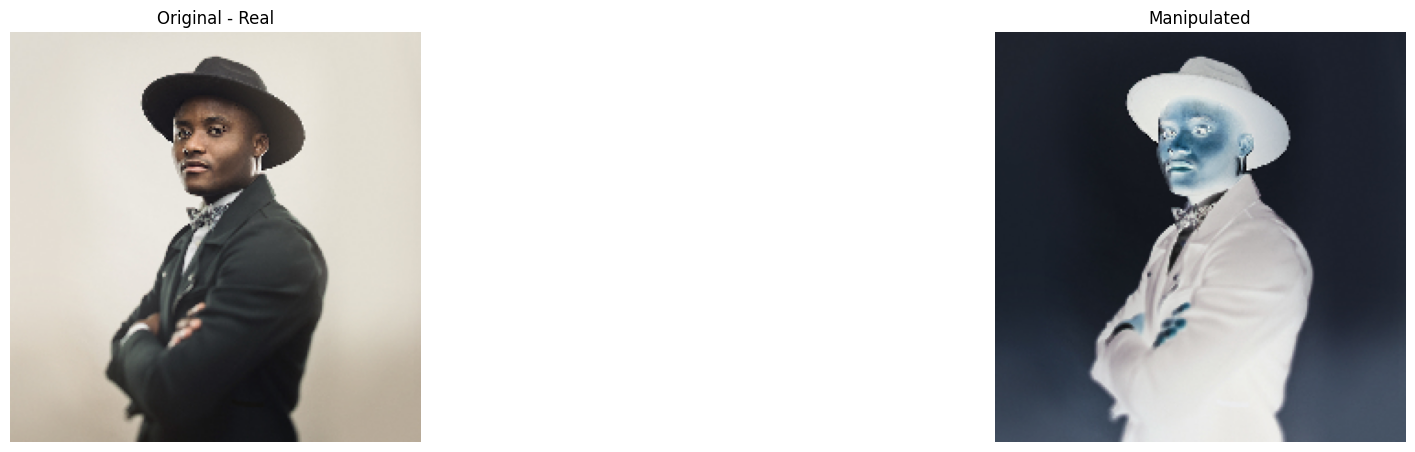

1/1 [==============================] - 0s 44ms/step


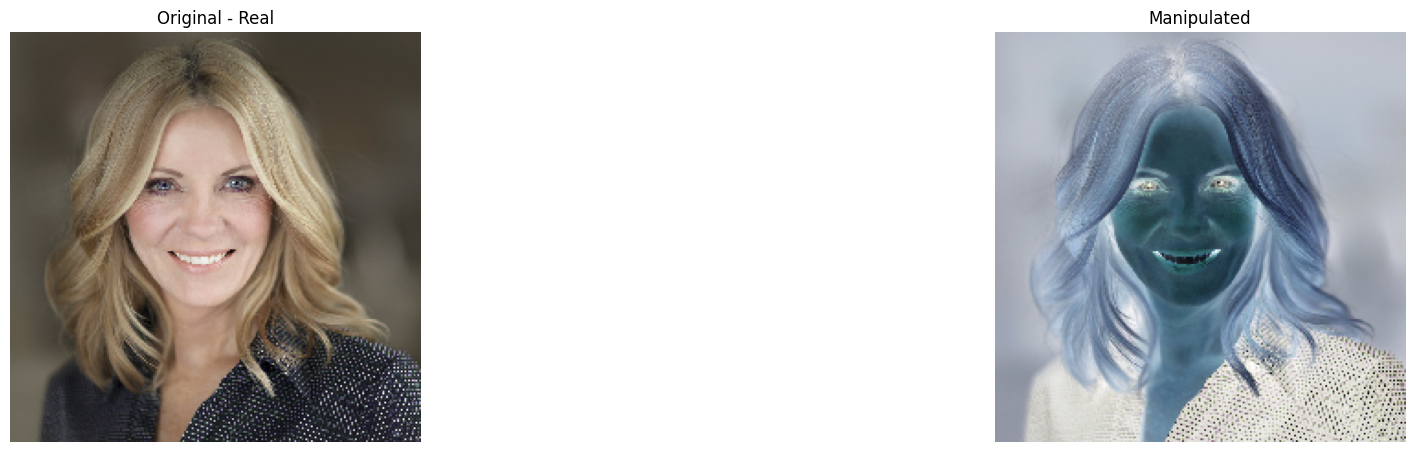

In [61]:
# Memproses setiap gambar input
for input_image_filename in input_image_filenames:
    # Membuat path lengkap ke gambar input
    input_image_path = os.path.join(input_directory, input_image_filename)

    # Memuat gambar input
    img = image.load_img(input_image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Tambahkan dimensi batch
    img_array /= 255.0

    # Membuat prediksi menggunakan model
    prediction = model.predict(img_array)
    predicted_class = "Real" if prediction[0][0] > 0.5 else "Real"

    # Menampilkan gambar input (sebelah kiri)
    plt.figure(figsize=(18, 6))
    plt.subplot(1, 3, 1)
    plt.imshow(img)
    plt.title(f"Original - {predicted_class}")
    plt.axis("off")

    # Proses manipulasi gambar (contoh: inversi warna)
    manipulated_img_array = 1 - img_array

    # Menampilkan gambar hasil manipulasi (sebelah kanan)
    plt.subplot(1, 3, 3)
    plt.imshow(manipulated_img_array[0])
    plt.title("Manipulated")
    plt.axis("off")

    plt.show()